In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MAIN=pd.read_csv("D:/Data Analysis/Regression/TC_POWER.csv")
BACKUP=pd.read_csv("D:/Data Analysis/Regression/TC_POWER.csv")

df=MAIN
df.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

# Preprocessing data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
#Summary statistics
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption  
count               52416.000000  
mean                17835.406218  
std                  6622.165099  
min                  5935.174070  
25%                 13129.326630  
50%                 16415.117470  
75%                 21624.100420  
max                 47598.326360

In [5]:
import datetime as dt

This shows that there are a years worth of data for every 10 minutes

In [6]:
df["date_parsed"]=df["DateTime"].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  object        
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
 9   date_parsed                52416 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.0+ MB


In [7]:
df.date_parsed.head()

0   2017-01-01 00:00:00
1   2017-01-01 00:10:00
2   2017-01-01 00:20:00
3   2017-01-01 00:30:00
4   2017-01-01 00:40:00
Name: date_parsed, dtype: datetime64[ns]

In [8]:
df.drop(['DateTime'],axis=1)

Temperature  Humidity  Wind Speed  general diffuse flows  \
0            6.559      73.8       0.083                  0.051   
1            6.414      74.5       0.083                  0.070   
2            6.313      74.5       0.080                  0.062   
3            6.121      75.0       0.083                  0.091   
4            5.921      75.7       0.081                  0.048   
...            ...       ...         ...                    ...   
52411        7.010      72.4       0.080                  0.040   
52412        6.947      72.6       0.082                  0.051   
52413        6.900      72.8       0.086                  0.084   
52414        6.758      73.0       0.080                  0.066   
52415        6.580      74.1       0.081                  0.062   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0              0.119               34055.69620                16128.87538   
1              0.085               29814.68354                19375.07599   
2              0.100               29128.10127                19006.68693   
3              0.096               28228.86076                18361.09422   
4              0.085               27335.69620                17872.34043   
...              ...                       ...                        ...   
52411          0.096               31160.45627                26857.31820   
52412          0.093               30430.41825                26124.57809   
52413          0.074               29590.87452                25277.69254   
52414          0.089               28958.17490                24692.23688   
52415          0.111               28349.80989                24055.23167   

       Zone 3  Power Consumption         date_parsed  
0                    20240.96386 2017-01-01 00:00:00  
1                    20131.08434 2017-01-01 00:10:00  
2                    19668.43373 2017-01-01 00:20:00  
3                    18899.27711 2017-01-01 00:30:00  
4                    18442.40964 2017-01-01 00:40:00  
...                          ...                 ...  
52411                14780.31212 2017-12-30 23:10:00  
52412                14428.81152 2017-12-30 23:20:00  
52413                13806.48259 2017-12-30 23:30:00  
52414                13512.60504 2017-12-30 23:40:00  
52415                13345.49820 2017-12-30 23:50:00  

[52416 rows x 9 columns]

### Creating Month, Day, Hour and Minutes Variable

In [9]:
df['Month']=df['date_parsed'].dt.month
df['Date']=df['date_parsed'].dt.day
df['Hour']=df['date_parsed'].dt.hour
df['Minute']=df['date_parsed'].dt.minute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  object        
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
 9   date_parsed                52416 non-null  datetime64[ns]
 10  Month                      52416 non-null  int32         
 11  Date                       52416 non-null  int32         
 12  Hour

In [10]:
#Selecting the day o the week based on the date
df['Day of the week']=df['date_parsed'].dt.weekday
df['Day of the week']=df['Day of the week'].astype('str')

In [11]:
#Dropping the DateTime axis
df=df.drop(['DateTime'],axis=1)

## Creating a new Quantitative Variables as total consumption

In [12]:
df["Total Power Consumption"]=df["Zone 1 Power Consumption"] + df["Zone 2  Power Consumption"] + df["Zone 3  Power Consumption"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Temperature                52416 non-null  float64       
 1   Humidity                   52416 non-null  float64       
 2   Wind Speed                 52416 non-null  float64       
 3   general diffuse flows      52416 non-null  float64       
 4   diffuse flows              52416 non-null  float64       
 5   Zone 1 Power Consumption   52416 non-null  float64       
 6   Zone 2  Power Consumption  52416 non-null  float64       
 7   Zone 3  Power Consumption  52416 non-null  float64       
 8   date_parsed                52416 non-null  datetime64[ns]
 9   Month                      52416 non-null  int32         
 10  Date                       52416 non-null  int32         
 11  Hour                       52416 non-null  int32         
 12  Minu

# EDA

In [14]:
df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Zone 1 Power Consumption  Zone 2  Power Consumption  \
0               34055.69620                16128.87538   
1               29814.68354                19375.07599   
2               29128.10127                19006.68693   
3               28228.86076                18361.09422   
4               27335.69620                17872.34043   

   Zone 3  Power Consumption         date_parsed  Month  Date  Hour  Minute  \
0                20240.96386 2017-01-01 00:00:00      1     1     0       0   
1                20131.08434 2017-01-01 00:10:00      1     1     0      10   
2                19668.43373 2017-01-01 00:20:00      1     1     0      20   
3                18899.27711 2017-01-01 00:30:00      1     1     0      30   
4                18442.40964 2017-01-01 00:40:00      1     1     0      40   

  Day of the week  Total Power Consumption  
0               6              70425.53544  
1               6              69320.84387  
2               6              67803.22193  
3               6              65489.23209  
4               6              63650.44627

## Visualisation of quantititive Variables

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Temperature                52416 non-null  float64       
 1   Humidity                   52416 non-null  float64       
 2   Wind Speed                 52416 non-null  float64       
 3   general diffuse flows      52416 non-null  float64       
 4   diffuse flows              52416 non-null  float64       
 5   Zone 1 Power Consumption   52416 non-null  float64       
 6   Zone 2  Power Consumption  52416 non-null  float64       
 7   Zone 3  Power Consumption  52416 non-null  float64       
 8   date_parsed                52416 non-null  datetime64[ns]
 9   Month                      52416 non-null  int32         
 10  Date                       52416 non-null  int32         
 11  Hour                       52416 non-null  int32         
 12  Minu

In [16]:
nums=['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows','Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption','Total Power Consumption']
time=['Month','Date','Hour','Minute']
df_nums=df.loc[:,nums]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


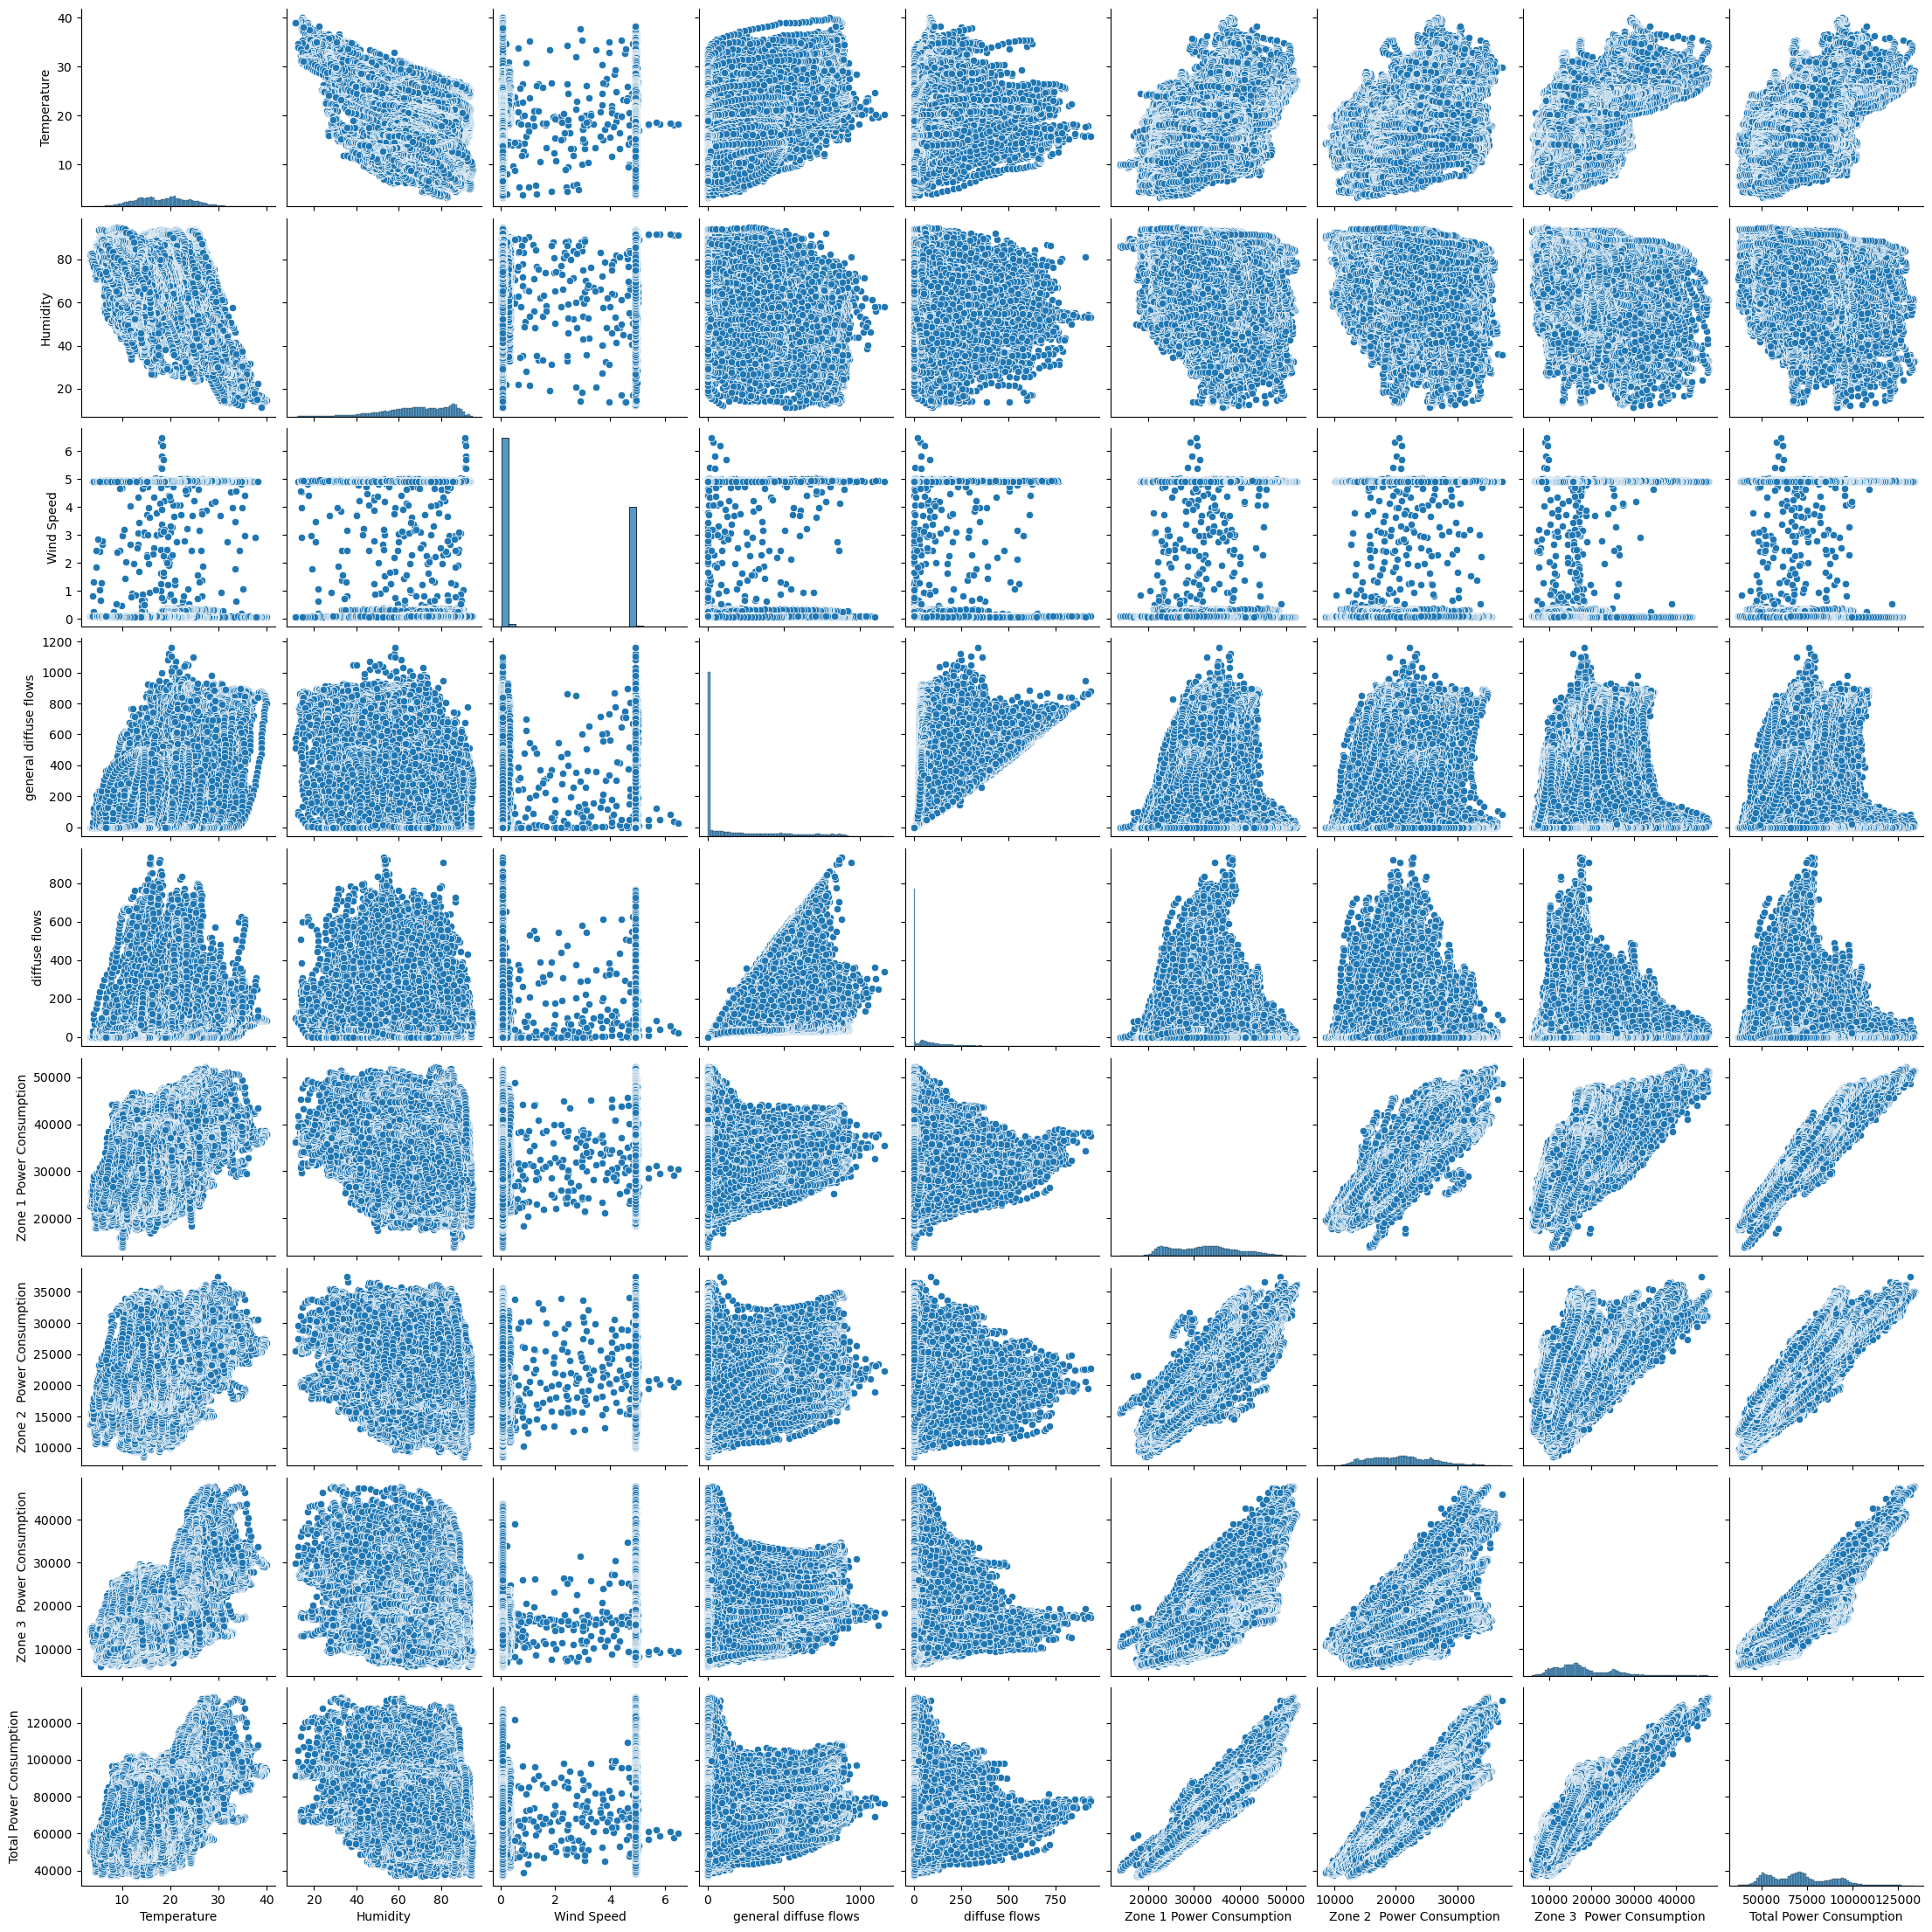

In [17]:
sns.pairplot(df_nums)
plt.show()

Apart from the zone Power Consumptions there isn't much of a linear relationship between the rest of the quantitative variables

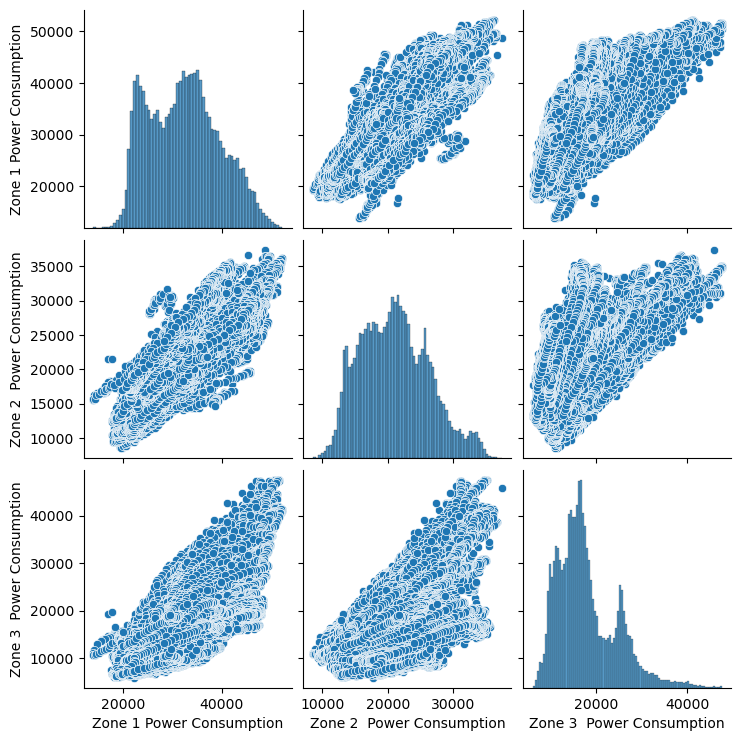

In [18]:
sns.pairplot(df_nums.loc[:,['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']])
plt.show()


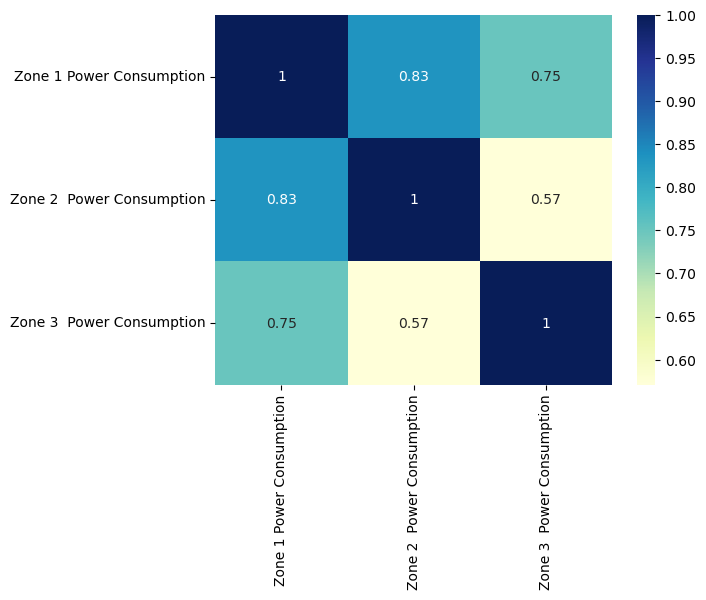

In [19]:
sns.heatmap(df_nums.loc[:,['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']].corr(),cmap="YlGnBu",annot=True)
plt.show()

We observe that there is a linear correlation between Zone 1 and Zones 2 and 3 but a relatively low correlation between zones 2 and 3

## Distributions of the quantitattive Variables

In [20]:
df_nums.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption  Total Power Consumption  
count               52416.000000             52416.000000  
mean                17835.406218             71222.885864  
std                  6622.165099             17143.138964  
min                  5935.174070             36785.039739  
25%                 13129.326630             56499.074640  
50%                 16415.117470             69788.790940  
75%                 21624.100420             83749.172310  
max                 47598.326360            134208.145950

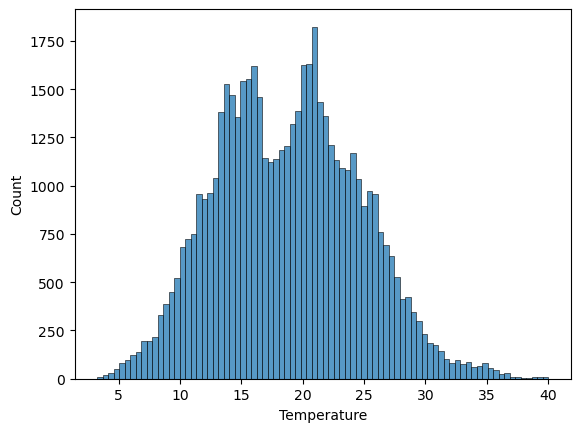

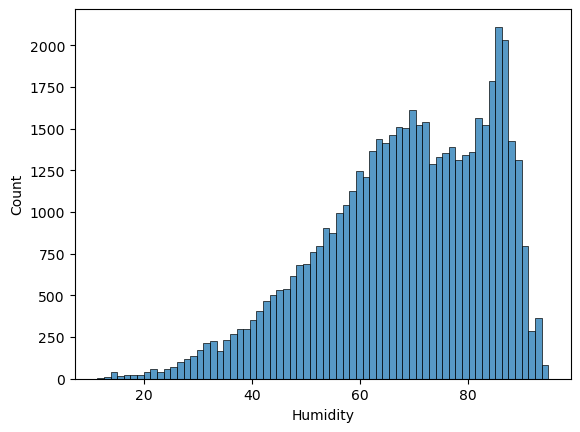

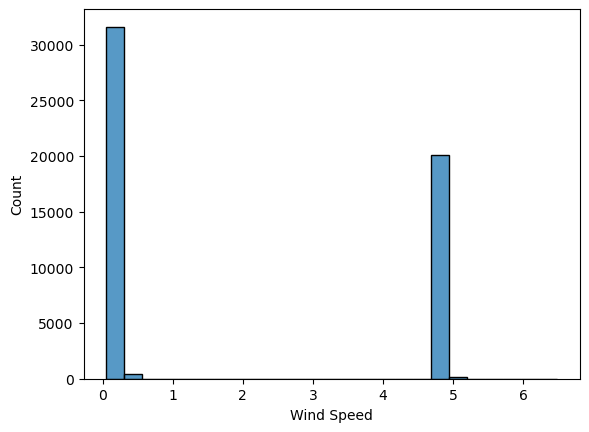

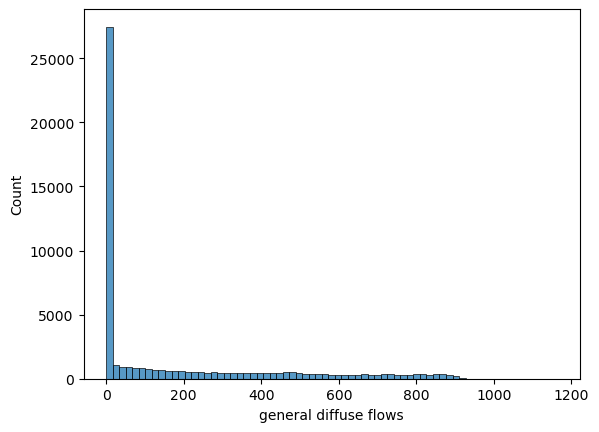

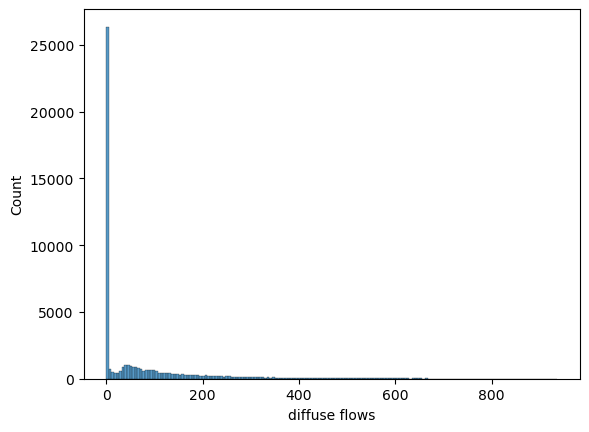

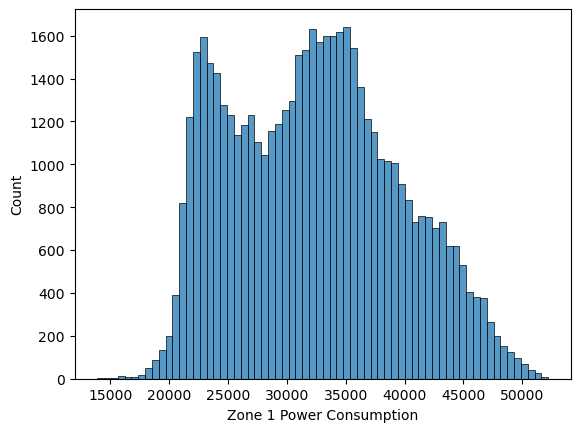

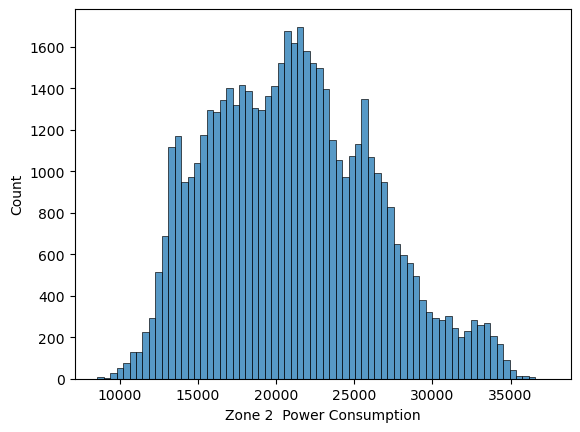

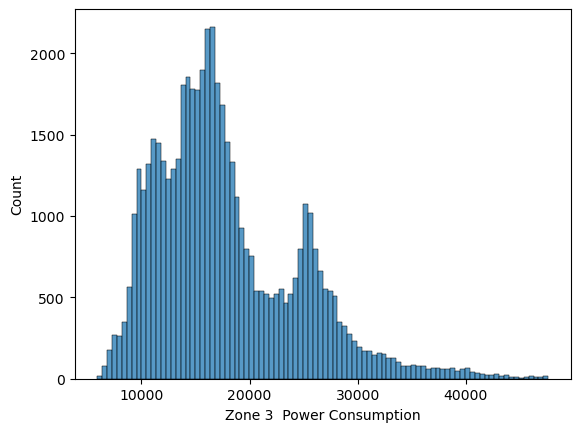

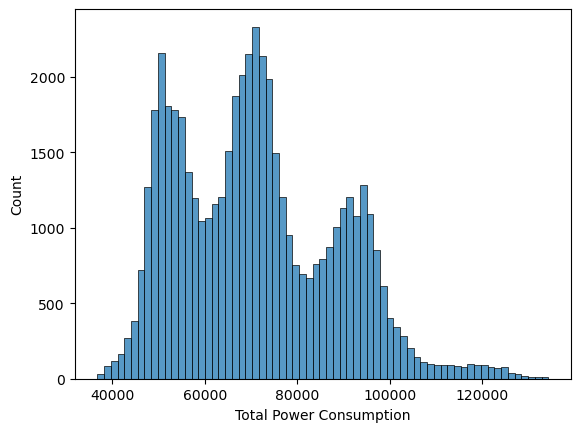

In [21]:
for i in df_nums.columns:
    sns.histplot(df_nums[i])
    plt.show()

Since we already are only considering the Total of the City we drop the Zone Power Consumptions

In [22]:
df=df.drop(["Zone 1 Power Consumption","Zone 2  Power Consumption","Zone 3  Power Consumption"],axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Temperature              52416 non-null  float64       
 1   Humidity                 52416 non-null  float64       
 2   Wind Speed               52416 non-null  float64       
 3   general diffuse flows    52416 non-null  float64       
 4   diffuse flows            52416 non-null  float64       
 5   date_parsed              52416 non-null  datetime64[ns]
 6   Month                    52416 non-null  int64         
 7   Date                     52416 non-null  int64         
 8   Hour                     52416 non-null  int64         
 9   Minute                   52416 non-null  int64         
 10  Day of the week          52416 non-null  object        
 11  Total Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(6)

# Time Series Analysis of data

In [24]:
tdf_month=df.groupby(["Month"]).agg(np.mean)
tdf_Date=df.groupby(["Date"]).agg(np.mean)
tdf_Hour=df.groupby(["Hour"]).agg(np.mean)
tdf_Minute=df.groupby(["Minute"]).agg(np.mean)

In [25]:
important_feat=["Temperature","Humidity","Wind Speed","Total Power Consumption"]

### Monthly Time Series

In [26]:
tdf_month.head()

Temperature   Humidity  Wind Speed  general diffuse flows  \
Month                                                              
1        12.743092  68.294122    0.707927             103.343396   
2        12.644443  66.551322    1.096494             125.768940   
3        14.579907  71.100029    1.006189             181.090957   
4        16.444463  75.242521    0.224269             159.399087   
5        20.293564  68.712440    2.298271             273.666324   

       diffuse flows  Date  Hour  Minute  Total Power Consumption  
Month                                                              
1          68.687413  16.0  11.5    25.0             68173.033601  
2          91.627936  14.5  11.5    25.0             67108.548882  
3          93.983753  16.0  11.5    25.0             66560.788896  
4          84.302805  15.5  11.5    25.0             67396.902281  
5         123.048394  16.0  11.5    25.0             69994.397979

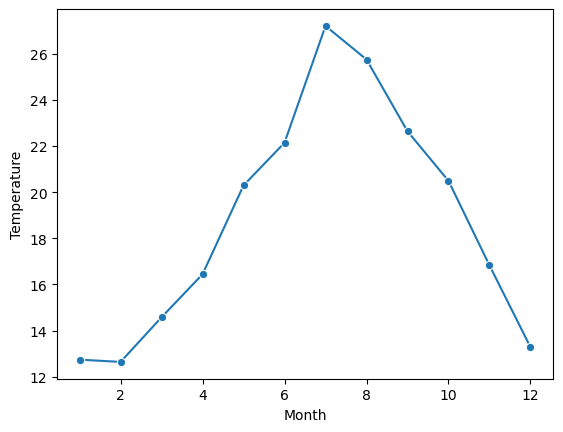

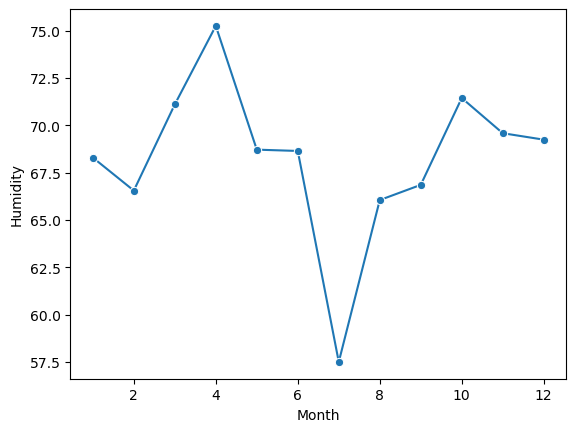

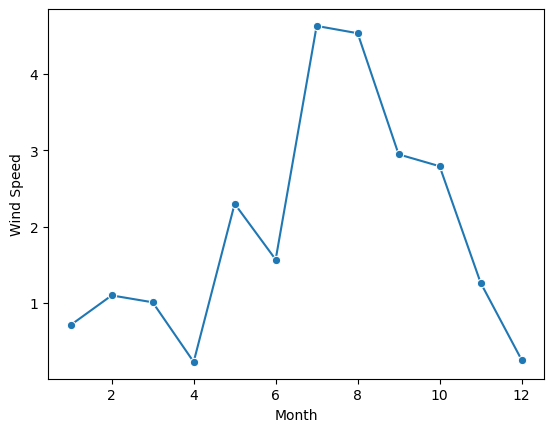

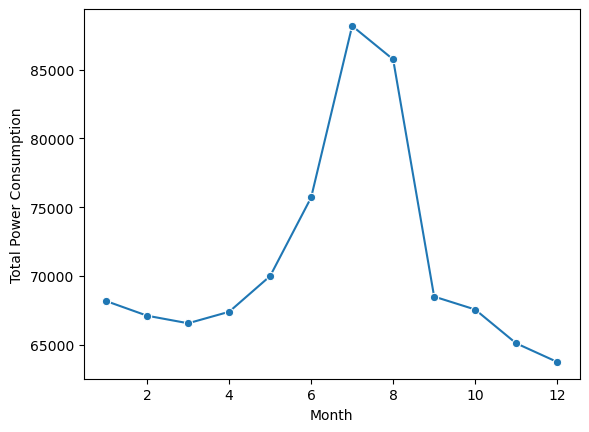

In [27]:
for i in important_feat:
    sns.lineplot(x="Month",y=i,data=tdf_month,marker="o")
    plt.show()

Observing the Power Usage we observe that there is an increasing trend up till july and a downward trend for the rest of the year

This justifies Analysing the data separately from Jan to July and the rest of the months

In [28]:
### Distribution of data allong the months of January to February and June to July October to November
df_before_Jul=df.loc[df.Month<=7]
df_after_Jul=df.loc[df.Month>7]
df_before_Jul.tail()

Temperature  Humidity  Wind Speed  general diffuse flows  \
30523        25.10     69.09       4.901                  0.084   
30524        25.15     68.72       4.904                  0.099   
30525        25.22     71.60       4.905                  0.080   
30526        25.10     74.70       4.907                  0.080   
30527        24.95     76.40       4.910                  0.051   

       diffuse flows         date_parsed  Month  Date  Hour  Minute  \
30523          0.111 2017-07-31 23:10:00      7    31    23      10   
30524          0.107 2017-07-31 23:20:00      7    31    23      20   
30525          0.107 2017-07-31 23:30:00      7    31    23      30   
30526          0.119 2017-07-31 23:40:00      7    31    23      40   
30527          0.130 2017-07-31 23:50:00      7    31    23      50   

      Day of the week  Total Power Consumption  
30523               0             107311.06513  
30524               0             105403.01741  
30525               0             103423.12049  
30526               0             101720.63712  
30527               0              99363.89122

In [29]:
tdf_Date_before_Jul=df_before_Jul.groupby(["Date"]).agg(np.mean)
tdf_Hour_before_Jul=df_before_Jul.groupby(["Hour"]).agg(np.mean)
tdf_Minute_before_Jul=df_before_Jul.groupby(["Minute"]).agg(np.mean)
tdf_Day_before_Jul=df_before_Jul.groupby(["Day of the week"]).agg(np.mean)

tdf_Date_after_Jul=df_after_Jul.groupby(["Date"]).agg(np.mean)
tdf_Hour_after_Jul=df_after_Jul.groupby(["Hour"]).agg(np.mean)
tdf_Minute_after_Jul=df_after_Jul.groupby(["Minute"]).agg(np.mean)
tdf_Day_after_Jul=df_after_Jul.groupby(["Day of the week"]).agg(np.mean)

In [30]:
tdf_Day_before_Jul.head(8)

Temperature   Humidity  Wind Speed  general diffuse flows  \
Day of the week                                                              
0                  18.246642  67.874731    1.330987             205.204625   
1                  17.859067  68.481940    1.611215             202.416267   
2                  17.895584  67.672262    2.006142             206.919289   
3                  17.951503  68.511278    1.918306             200.528057   
4                  18.347958  68.103373    1.619674             206.608691   
5                  18.136323  68.202206    1.735480             199.332195   
6                  18.055782  67.124111    1.431569             202.179903   

                 diffuse flows     Month       Date  Hour  Minute  \
Day of the week                                                     
0                    92.428156  4.032258  15.741935  11.5    25.0   
1                   101.893409  3.933333  16.233333  11.5    25.0   
2                    97.208821  4.000000  15.266667  11.5    25.0   
3                    88.795568  4.033333  15.233333  11.5    25.0   
4                    86.681983  4.033333  16.233333  11.5    25.0   
5                    85.378486  4.100000  15.200000  11.5    25.0   
6                    88.129718  4.000000  15.709677  11.5    25.0   

                 Total Power Consumption  
Day of the week                           
0                           72715.696645  
1                           72334.251756  
2                           72858.352285  
3                           73190.957446  
4                           72249.369787  
5                           71851.947979  
6                           68496.475202

## Hourly distribution

### Months before July

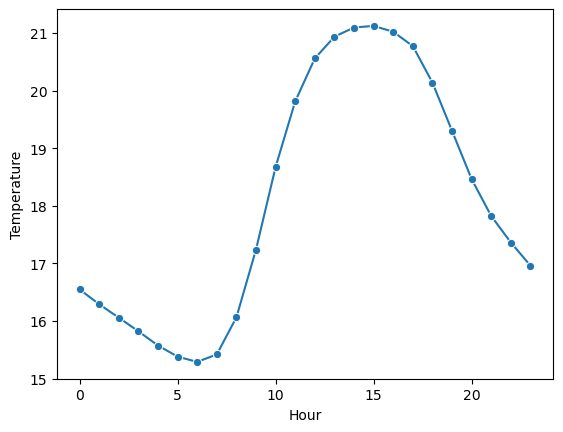

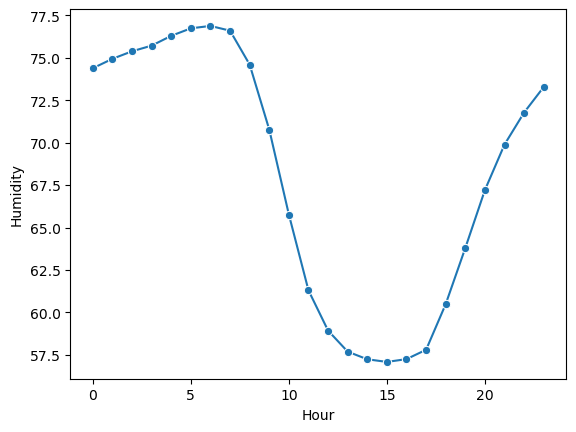

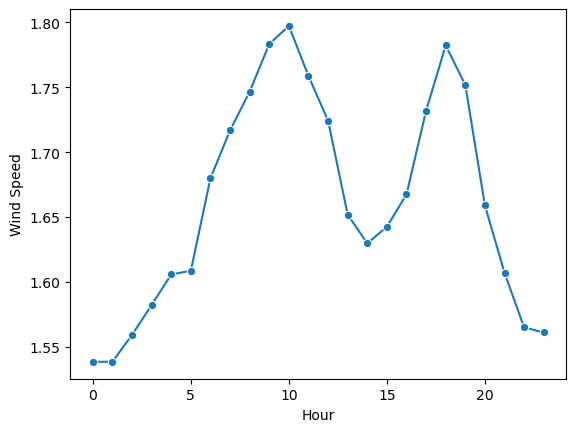

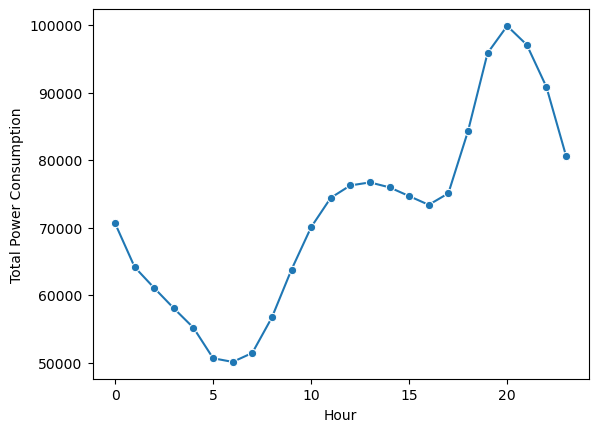

In [31]:
for i in important_feat:
    sns.lineplot(x="Hour",y=i,data=tdf_Hour_before_Jul,marker="o")
    plt.show()

### Months after July

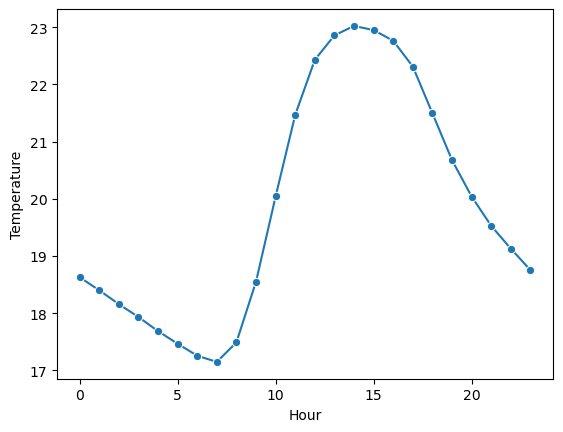

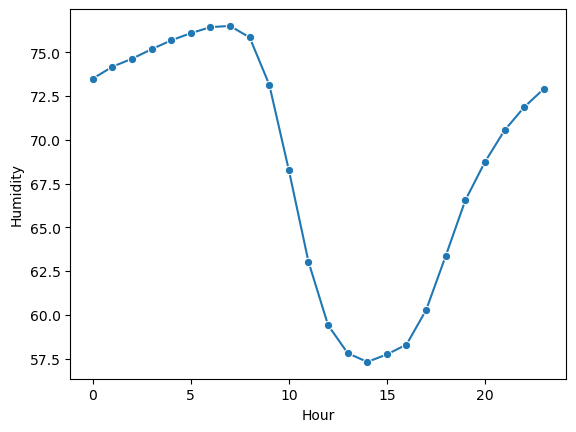

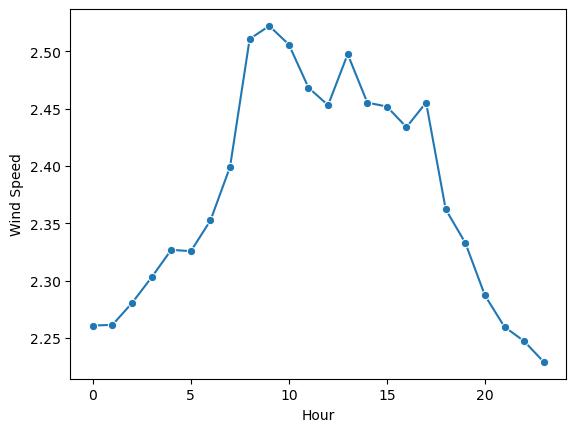

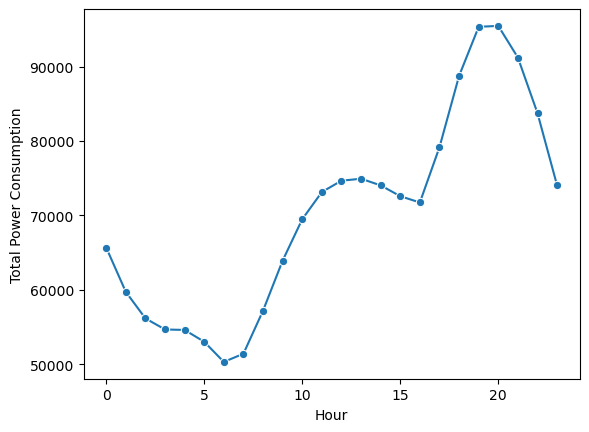

In [32]:
for i in important_feat:
    sns.lineplot(x="Hour",y=i,data=tdf_Hour_after_Jul,marker="o")
    plt.show()

## Daily Power Consumption

### Months Before July

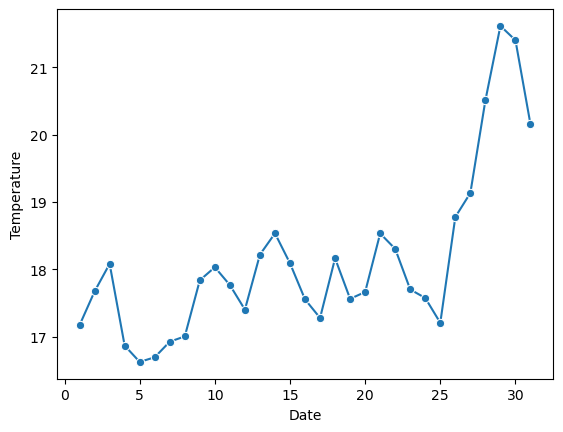

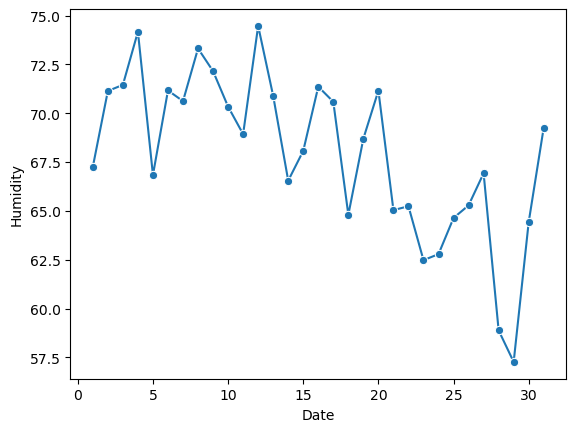

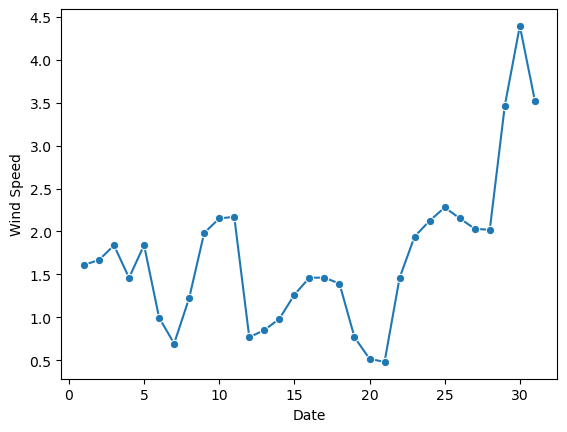

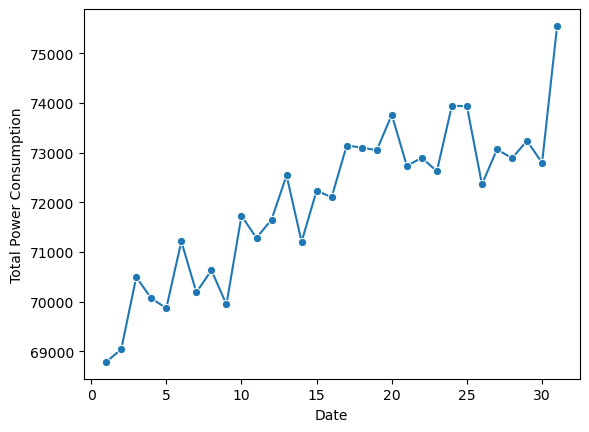

In [33]:
for i in important_feat:
    sns.lineplot(x="Date",y=i,data=tdf_Date_before_Jul,marker="o")
    plt.show()

### Months After July

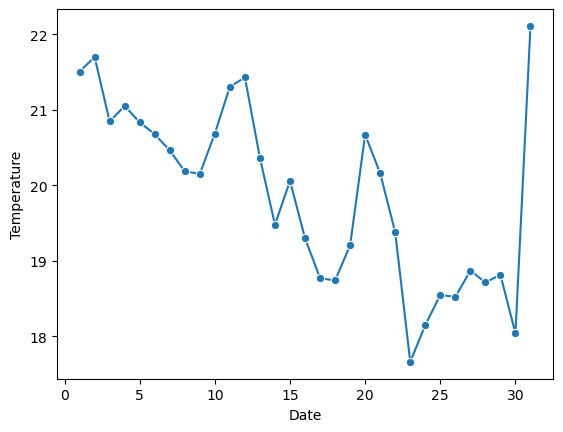

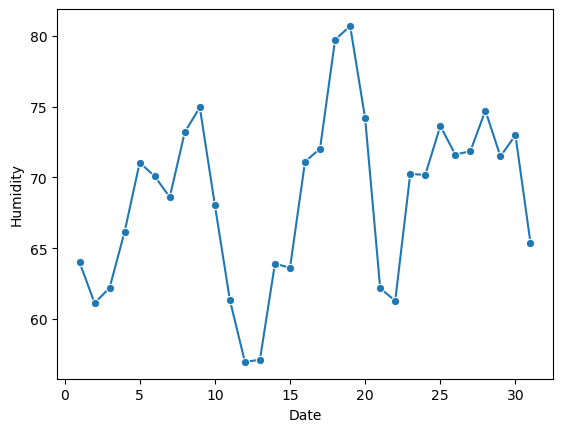

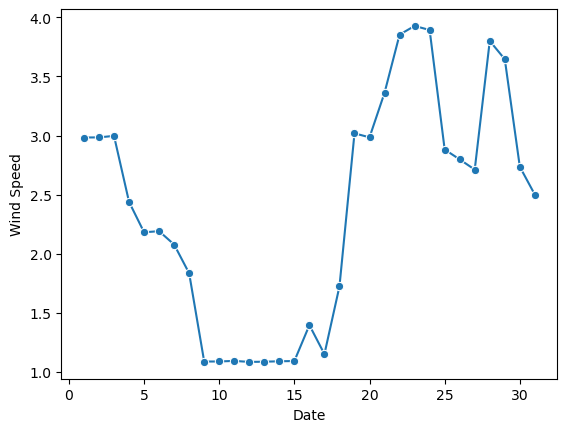

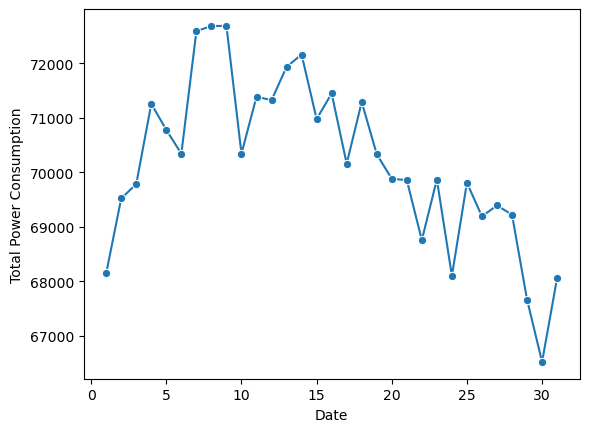

In [34]:
for i in important_feat:
    sns.lineplot(x="Date",y=i,data=tdf_Date_after_Jul,marker="o")
    plt.show()

## Daywise Power Consumption

### Before July

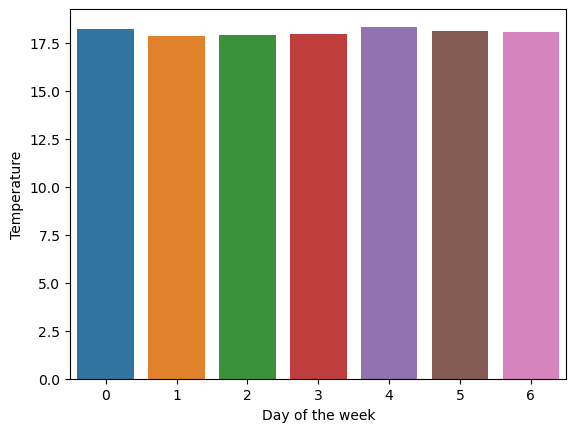

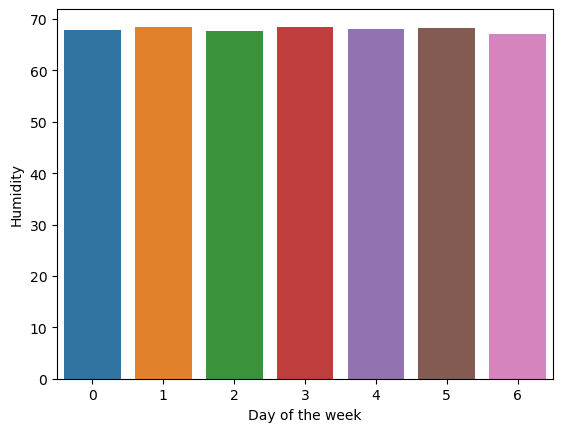

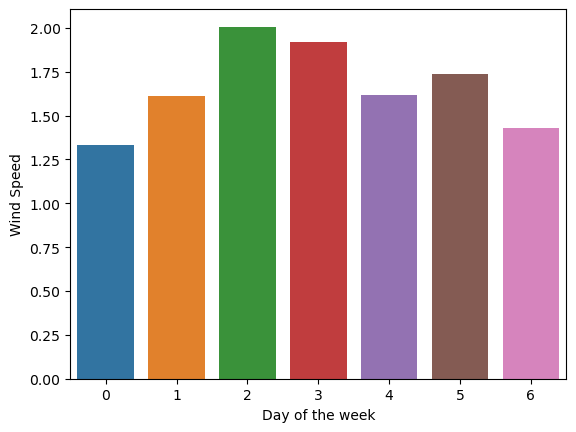

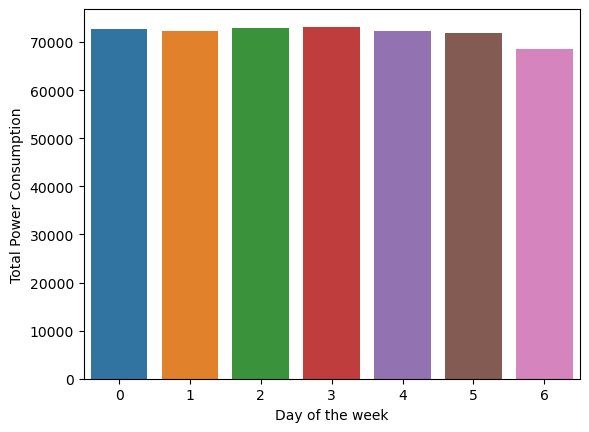

In [35]:
for i in important_feat:
    sns.barplot(x=tdf_Day_before_Jul.index,y=i,data=tdf_Day_before_Jul)
    plt.show()

### After July

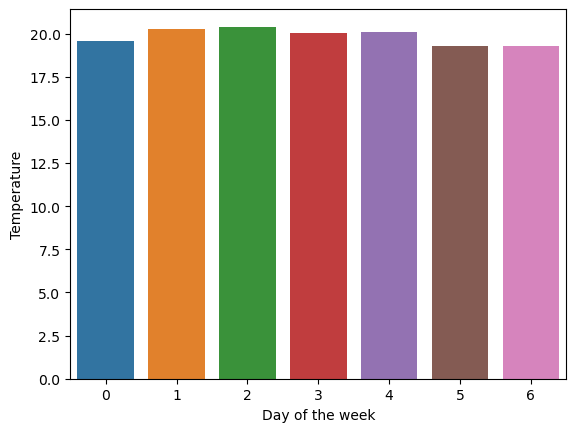

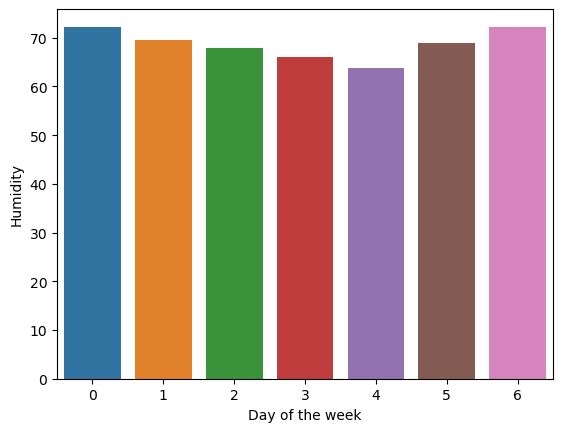

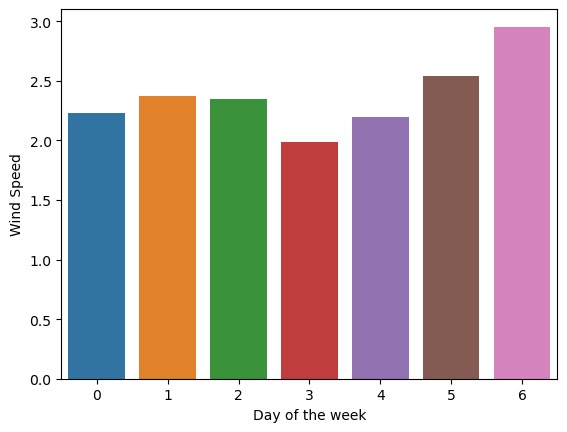

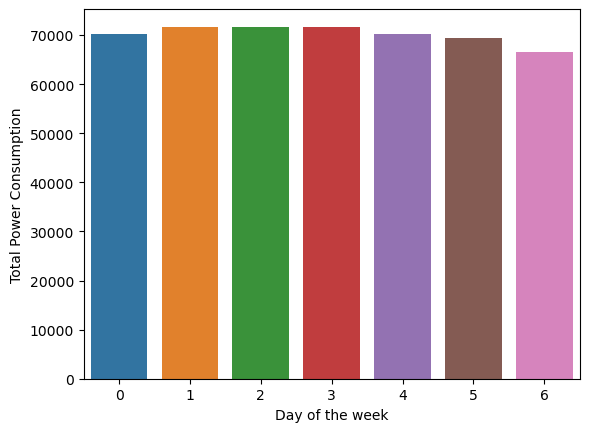

In [36]:
for i in important_feat:
    sns.barplot(x=tdf_Day_after_Jul.index,y=i,data=tdf_Day_after_Jul)
    plt.show()

### Conducting ANOVA on before and after data

In [37]:
from scipy.stats import f_oneway

#### After

# Fitting the Model

In [38]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'date_parsed', 'Month', 'Date', 'Hour', 'Minute',
       'Day of the week', 'Total Power Consumption'],
      dtype='object')

In [39]:
#Selecting the predictors we consider
main_feat=['Temperature','Humidity','Wind Speed','Month', 'Date', 'Hour']
response='Total Power Consumption'

### Train and Test Split

In [40]:
df_train=df.loc[df.Month!=12]
df_test=df.loc[df.Month==12]

print(df_test.tail())
print(".................................................................")
print(df_train.head())

       Temperature  Humidity  Wind Speed  general diffuse flows  \
52411        7.010      72.4       0.080                  0.040   
52412        6.947      72.6       0.082                  0.051   
52413        6.900      72.8       0.086                  0.084   
52414        6.758      73.0       0.080                  0.066   
52415        6.580      74.1       0.081                  0.062   

       diffuse flows         date_parsed  Month  Date  Hour  Minute  \
52411          0.096 2017-12-30 23:10:00     12    30    23      10   
52412          0.093 2017-12-30 23:20:00     12    30    23      20   
52413          0.074 2017-12-30 23:30:00     12    30    23      30   
52414          0.089 2017-12-30 23:40:00     12    30    23      40   
52415          0.111 2017-12-30 23:50:00     12    30    23      50   

      Day of the week  Total Power Consumption  
52411               5              72798.08659  
52412               5              70983.80786  
52413               5  

In [41]:
#X dataset
x_train=df_train.loc[:,main_feat]
y_train=df_train[response]

#Testing Data
x_test=df_test.loc[:,main_feat]
y_test=df_test[response]

## Ridge and Lasso

## Grid Searching Alpha Values

In [48]:
#Importing sklearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange 

#defin model
ridge_model=Lasso()

#Define Model Evaluation Method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

#Define grid
grid=dict()

grid['alpha']=arange(0,1,0.01)

#Define Search
search=GridSearchCV(ridge_model,grid,scoring='neg_root_mean_squared_error',cv=cv,n_jobs=-1)

#perform search
results=search.fit(x_train,y_train)



In [53]:
#Summarize
print('RMSE:',results.best_score_)
print('Alpha: ',results.best_params_)

RMSE: -10862.87168691874
Alpha:  {'alpha': 0.99}


In [59]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
 
# Train the model 
ridgeR = Ridge(alpha = 0.99)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
root_mean_squared_error_ridge = np.sqrt(np.mean((y_pred - y_test)**2))
print(root_mean_squared_error_ridge)
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

10415.333041806398
       Columns  Coefficient Estimate
0  Temperature           1324.693521
1     Humidity             60.857773
2   Wind Speed            461.252190
3        Month           -889.661834
4         Date              8.299284
5         Hour           1492.037667


## Lasso

In [60]:
#Importing sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange 

#defin model
lasso_model=Lasso()

#Define Model Evaluation Method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

#Define grid
grid=dict()

grid['alpha']=arange(0,1,0.01)

#Define Search
search=GridSearchCV(lasso_model,grid,scoring='neg_root_mean_squared_error',cv=cv,n_jobs=-1)

#perform search
results=search.fit(x_train,y_train)

In [269]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
root_mean_squared_error = np.sqrt(np.mean((y_pred1 - y_test)**2))
print("Root mean squared error on test set", root_mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Root mean squared error on test set 10414.108524641833
       Columns  Coefficient Estimate
0  Temperature           1324.618851
1     Humidity             60.835764
2   Wind Speed            461.050802
3        Month           -889.449110
4         Date              8.294977
5         Hour           1492.018188


## Elastic Net

In [270]:
# import model
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
root_mean_squared_error = np.sqrt(np.mean((y_pred_elastic - y_test)**2))
print("Root mean Squared Error on test set", root_mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Root mean Squared Error on test set 9906.633664038964


Columns  Coefficient Estimate
0  Temperature           1276.750481
1     Humidity             51.060455
2   Wind Speed            427.428125
3        Month           -798.695578
4         Date              9.548269
5         Hour           1479.287763

# XG Boosting